# Multiple images in Schwarzschild spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/ges_null_geod.ipynb) to download the notebook file (ipynb format). To run it, you must start SageMath with `sage -n jupyter`.

In [1]:
version()

'SageMath version 9.1.beta0, Release Date: 2020-01-10'

In [2]:
%display latex

## Schwarzschild metric

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
X.<t, r, th, ph> = M.chart(r't r:(2.01,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\phi')
X

Chart (M, (t, r, th, ph))

In [4]:
g = M.metric()
m = 1
g[0,0] = -(1-2*m/r)
g[1,1] = 1/(1-2*m/r)
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2/r - 1) dt*dt - 1/(2/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

For plots:

In [5]:
E.<x, y, z> = EuclideanSpace()
phi = M.diff_map(E, [r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)])
phi.display()

M --> E^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

## Bunch of geodesics 

In [6]:
def initial_vector(r0, b, ph0=0, E=1, inward=False):
    t0, th0 = 0, pi/2
    L = b*E
    vt0 = 1/(1-2*m/r0)
    vr0 = sqrt(E^2 - L^2/r0^2*(1-2*m/r0))
    if inward:
        vr0 = - vr0
    vth0 = 0
    vph0 = L / r0^2
    p0 = M((t0, r0, th0, ph0), name='p_0')
    return M.tangent_space(p0)((vt0, vr0, vth0, vph0), name='v_0')

In [7]:
r0 = 100  # distance of the source
s = var('s')  # affine parameter along a geodesic

In [8]:
b_max = 12.
b_min = - b_max
nb = 31
db = (b_max - b_min) / (nb - 1)
b_sel = [(b_min + i*db, 'green') for i in range(nb)]
#
b_min = 5.0
b_max = 5.4
nb = 3
db = (b_max - b_min) / (nb - 1)
b_sel += [(b_min + i*db, 'olive') for i in range(nb)]
#
b_min = -5.4
b_max = -5.0
nb = 3
db = (b_max - b_min) / (nb - 1)
b_sel += [(b_min + i*db, 'olive') for i in range(nb)]
b_sel

[(-12.0000000000000, 'green'),
 (-11.2000000000000, 'green'),
 (-10.4000000000000, 'green'),
 (-9.60000000000000, 'green'),
 (-8.80000000000000, 'green'),
 (-8.00000000000000, 'green'),
 (-7.20000000000000, 'green'),
 (-6.40000000000000, 'green'),
 (-5.60000000000000, 'green'),
 (-4.80000000000000, 'green'),
 (-4.00000000000000, 'green'),
 (-3.20000000000000, 'green'),
 (-2.40000000000000, 'green'),
 (-1.60000000000000, 'green'),
 (-0.799999999999999, 'green'),
 (0.000000000000000, 'green'),
 (0.800000000000001, 'green'),
 (1.60000000000000, 'green'),
 (2.40000000000000, 'green'),
 (3.20000000000000, 'green'),
 (4.00000000000000, 'green'),
 (4.80000000000000, 'green'),
 (5.60000000000000, 'green'),
 (6.40000000000000, 'green'),
 (7.20000000000000, 'green'),
 (8.00000000000000, 'green'),
 (8.80000000000000, 'green'),
 (9.60000000000000, 'green'),
 (10.4000000000000, 'green'),
 (11.2000000000000, 'green'),
 (12.0000000000000, 'green'),
 (5.00000000000000, 'olive'),
 (5.20000000000000, 'olive'),
 (5.40000000000000, 'olive'),
 (-5.40000000000000, 'olive'),
 (-5.20000000000000, 'olive'),
 (-5.00000000000000, 'olive')]

Computation:

In [9]:
geodesics = {}
for b, color in b_sel:
    print('b = {:.6f} m'.format(float(b)))
    ph0 = asin(b/r0)
    v0 = initial_vector(r0, b, ph0=ph0, inward=True)
    geod = M.integrated_geodesic(g, (s, 0, 200), v0, across_charts=True)
    sol = geod.solve_across_charts(step=0.05) 
    interp = geod.interpolate()   
    geodesics[b] = geod

b = -12.000000 m
b = -11.200000 m
b = -10.400000 m
b = -9.600000 m
b = -8.800000 m
b = -8.000000 m
b = -7.200000 m
b = -6.400000 m
b = -5.600000 m
b = -4.800000 m
b = -4.000000 m
b = -3.200000 m
b = -2.400000 m
b = -1.600000 m
b = -0.800000 m
b = 0.000000 m
b = 0.800000 m
b = 1.600000 m
b = 2.400000 m
b = 3.200000 m
b = 4.000000 m
b = 4.800000 m
b = 5.600000 m
b = 6.400000 m
b = 7.200000 m
b = 8.000000 m
b = 8.800000 m
b = 9.600000 m
b = 10.400000 m
b = 11.200000 m
b = 12.000000 m
b = 5.000000 m
b = 5.200000 m
b = 5.400000 m
b = -5.400000 m
b = -5.200000 m
b = -5.000000 m


## Images of a generic source $S$

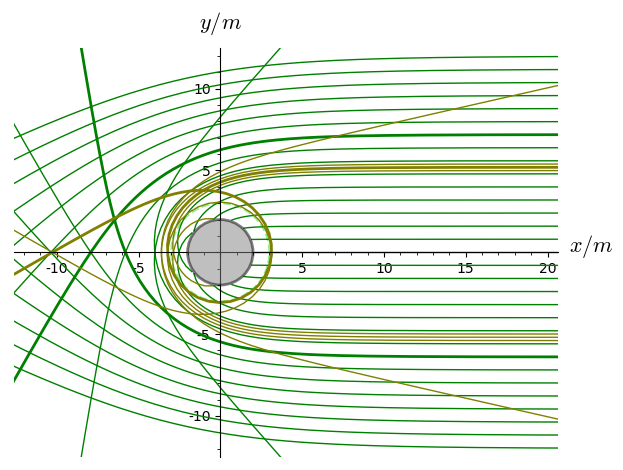

In [10]:
graph = circle((0, 0), 2*m, edgecolor='black', thickness=2, fill=True, facecolor='grey', 
               alpha=0.5)
graph += circle((0, 0), 3*m, color='lightgreen', thickness=1.5, linestyle='--', zorder=1)
b_spec = [7.2, 5.2, -6.4]  # geodesics through S
for b, color in b_sel:
    thickness = 2 if any(abs(b - bs)<1e-14 for bs in b_spec) else 1 
    graph += geodesics[b].plot_integrated(mapping=phi, ambient_coords=(x,y), plot_points=500,
                                         across_charts=True, aspect_ratio=1, color=[color], 
                                         thickness=thickness, zorder=2) 
 
show(graph, xmin=-12, xmax=20, ymin=-12, ymax=12, axes_labels=[r'$x/m$', r'$y/m$'])

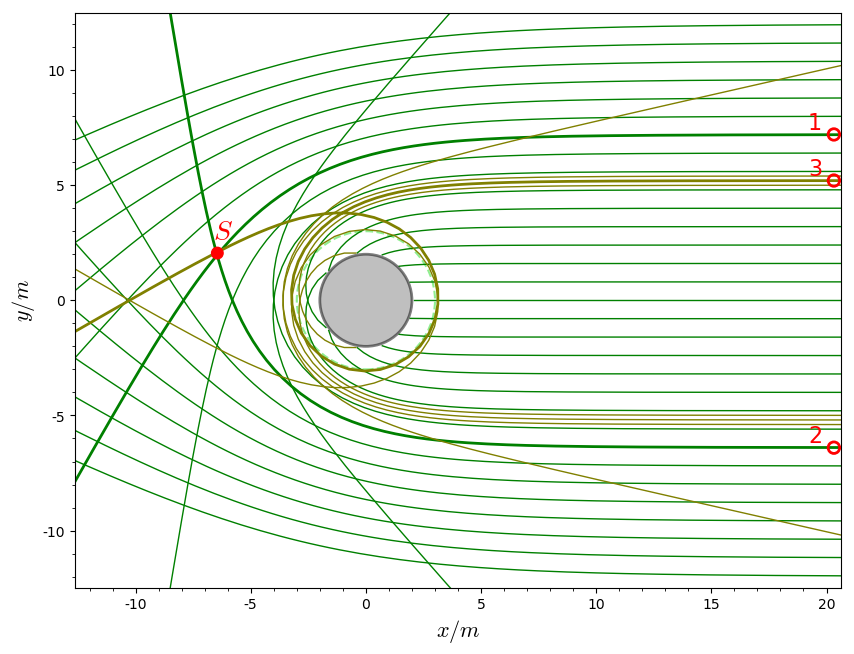

In [11]:
graphp = graph + circle((-6.45, 2.05), 0.25, fill=True, color='red') \
         + text(r"$S$", (-6.2, 3.), color='red', fontsize=20) \
         + circle((20.32, 5.2), 0.25, thickness=2, color='red') \
         + text("3", (19.5, 5.7), color='red', fontsize=16) \
         + circle((20.32, 7.2), 0.25, thickness=2,color='red') \
         + text("1", (19.5, 7.7), color='red', fontsize=16) \
         + circle((20.32, -6.4), 0.25, thickness=2, color='red') \
         + text("2", (19.5, -5.9), color='red', fontsize=16)
show(graphp, xmin=-12, xmax=20, ymin=-12, ymax=12, axes_labels=[r'$x/m$', r'$y/m$'],
     frame=True, axes=False, figsize=10)

In [12]:
graphp.save('ges_mult_images.pdf', xmin=-12, xmax=20, ymin=-12, ymax=12, 
            axes_labels=[r'$x/m$', r'$y/m$'], frame=True, axes=False, figsize=10)

## Image of an aligned source (source on the $x$-axis)

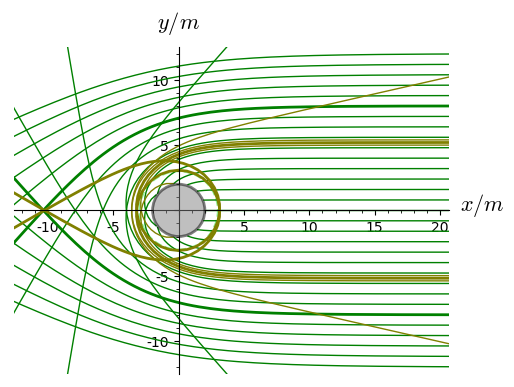

In [13]:
graph = circle((0, 0), 2*m, edgecolor='black', thickness=2, fill=True, facecolor='grey', 
               alpha=0.5)
graph += circle((0, 0), 3*m, color='lightgreen', thickness=1.5, linestyle='--', zorder=1)
b_spec = [8, -8, 5.2, -5.2]  # geodesics through A
for b, color in b_sel:
    thickness = 2 if any(abs(b - bs)<1e-14 for bs in b_spec) else 1 
    graph += geodesics[b].plot_integrated(mapping=phi, ambient_coords=(x,y), plot_points=500,
                                         across_charts=True, aspect_ratio=1, color=[color], 
                                         thickness=thickness, zorder=2) 
 
show(graph, xmin=-12, xmax=20, ymin=-12, ymax=12, axes_labels=[r'$x/m$', r'$y/m$'])

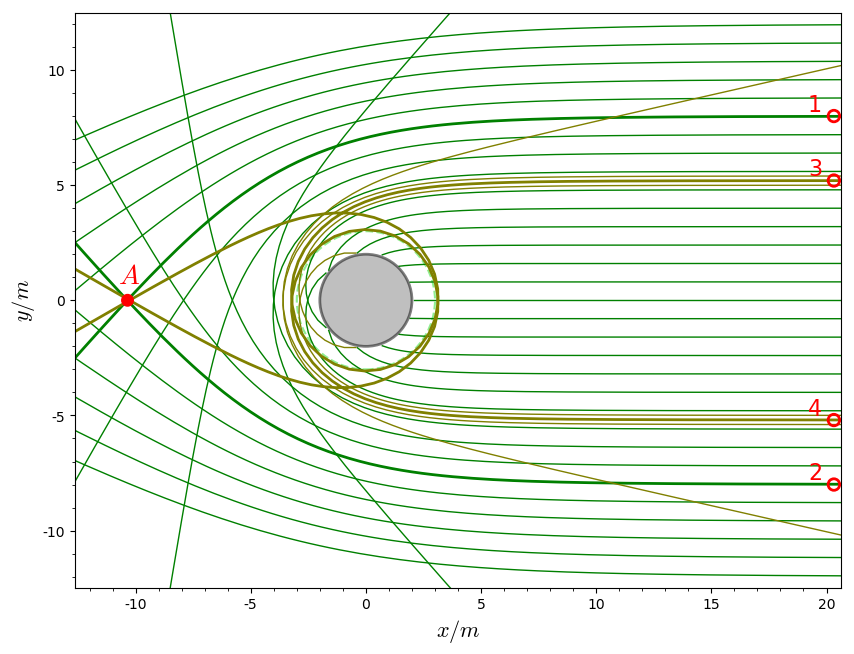

In [14]:
graphp = graph + circle((-10.35, 0.), 0.25, fill=True, color='red') \
         + text(r"$A$", (-10.3, 1.1), color='red', fontsize=20) \
         + circle((20.32, 5.2), 0.25, thickness=2, color='red') \
         + text("3", (19.5, 5.7), color='red', fontsize=16) \
         + circle((20.32, -5.2), 0.25, thickness=2, color='red') \
         + text("4", (19.5, -4.7), color='red', fontsize=16) \
         + circle((20.32, 8.0), 0.25, thickness=2,color='red') \
         + text("1", (19.5, 8.5), color='red', fontsize=16) \
         + circle((20.32, -8.0), 0.25, thickness=2, color='red') \
         + text("2", (19.5, -7.5), color='red', fontsize=16)
show(graphp, xmin=-12, xmax=20, ymin=-12, ymax=12, axes_labels=[r'$x/m$', r'$y/m$'],
     frame=True, axes=False, figsize=10)

In [15]:
graphp.save('ges_images_aligned.pdf', xmin=-12, xmax=20, ymin=-12, ymax=12, 
            axes_labels=[r'$x/m$', r'$y/m$'], frame=True, axes=False, figsize=10)